In [1]:
%matplotlib inline

In [16]:
from matplotlib import pyplot as plt
import numpy as np


In [3]:

#each point is length, width, type (0,1)
data = [[3, 1.5, 1],
       [2, 1, 0],
       [4, 1.5, 1],
       [3, 1, 0],
       [3.5, .5, 1],
       [2, .5, 0],
       [5.5, 1, 1],
       [1, 1, 0]]
mystery_flower = [4.5, 1]

In [14]:
# network

#   o    flower type
#  / \   w1, w2, b
# o   o  length, width

w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

In [7]:
np.random.randn()

1.1136542378706062

In [23]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# Derivate, sigmoid prime
def sigmoid_p(x):
    return sigmoid(x) * (1-sigmoid(x))

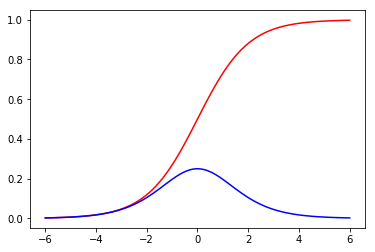

In [27]:
# linspace() gives evenly spaced numbers from 'start','end', then # of intervals
T = np.linspace(-6, 6, 100)
#Y = sigmoid(T)
#plt.plot(T,Y)
#Y = sigmoid_p(T)
plt.plot(T, sigmoid(T), c='r')
plt.plot(T, sigmoid_p(T), c='b')

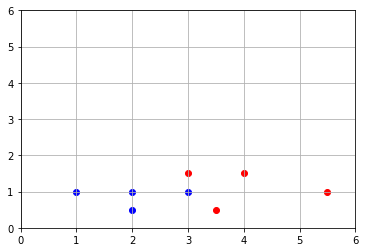

In [46]:
# Scatter Data

plt.axis([0,6,0,6])
plt.grid()

for i in range(len(data)):
    point = data[i]
    color = "r"
    # Here we match color to the 3rd 'data' value
    if point[2] == 0:
        # BLUE is 0, RED is 1
        color = "b"
    # x-axis is length point[0], y-axis is height point[1]
    plt.scatter(point[0], point[1], c=color)
    

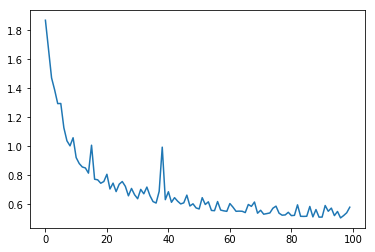

In [61]:
# training loop

def train():

    #random init of weights
    w1 = np.random.randn()
    w2 = np.random.randn()
    b = np.random.randn()

    iterations = 10000
    learning_rate = .1
    costs = []
    
    # i in range(1, 10000):
    for i in range(iterations):
        # get random integers to indexes in data(which holds flower data from beginning)
        ri = np.random.randint(len(data))
        point = data[ri]
        # Shows the random flowers I chose
        #print(point)

        # weighted average of the points?
        z = point[0]*w1 + point[1]*w2 + b
        pred = sigmoid(z)
        #print(pred)

        target = point[2]
        # (pred - target)^2
        cost = np.square(pred-target)
        # Blue(0) has a greater cost, b/c the predictions were higher(closer to 1)

        # Putting all the costs into this list
        #costs.append(cost)

        # Gives you updates of the cost, every 100 runs
        if i % 100 == 0:
            c = 0
            # iterates through every flower, calculates cost, and puts it in an array to be graphed
            # this way gives you less data points
            for j in range(len(data)):
                p = data[j]
                p_pred = sigmoid(w1 * p[0] + w2 * p[1] + b)
                c += np.square(p_pred - p[2])
            costs.append(c)
            #OTHER WAY 25:44
            #point = data[r]
            
            #z = point[0]*w1 + point[1]*w2 + b
            #pred = sigmoid(z)
            
            #target = point[2]
            #cost_sum += np.square(pred - target)
        # costs.append(cost_sum/len(data))

        dcost_pred = 2 * (pred - target)
        dpred_dz = sigmoid_p(z)

        dz_dw1 = point[0]
        dz_dw2 = point[1]
        dz_db = 1

        dcost_dz = dcost_pred * dpred_dz

        dcost_dw1 = dcost_dz * dz_dw1
        dcost_dw2 = dcost_dz * dz_dw2
        dcost_db = dcost_dz * dz_db

        w1 = w1 - learning_rate * dcost_dw1
        w2 = w2 - learning_rate * dcost_dw2
        b = b - learning_rate * dcost_db

    return costs, w1, w2, b

# Using a tuple, we return the 4 values and assign them in line
costs, w1, w2, b = train()

fig = plt.plot(costs)

In [62]:
# used to compare the flower data w/ our prediction
# Blue = 0, Red = 1
for i in range(len(data)):
    point = data[i]
    print(point)
    z = point[0]*w1 + point[1]*w2 + b
    pred = sigmoid(z)
    print("pred: {}".format(pred))

[3, 1.5, 1]
pred: 0.5485254214940438
[2, 1, 0]
pred: 0.06516105066545134
[4, 1.5, 1]
pred: 0.9312610679617249
[3, 1, 0]
pred: 0.4373305542695199
[3.5, 0.5, 1]
pred: 0.6241109465713878
[2, 0.5, 0]
pred: 0.042687247609468765
[5.5, 1, 1]
pred: 0.9969108654787318
[1, 1, 0]
pred: 0.006212119016821395


In [67]:
# Result shows that it predicted the mystery flower is Red
z = mystery_flower[0]*w1 + mystery_flower[1]*w2 + b
pred = sigmoid(z)
pred

0.9666010389590561

In [68]:
import os

In [ ]:
os.system